In [1]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import timedelta
#%matplotlib notebook
#magic
#from https://stackoverflow.com/questions/36994746/how-to-find-path-and-distance-between-two-coordinates-using-osm-and-python

/home/thibo/.local/lib/python3.8/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
#https://github.com/gboeing/osmnx-examples/tree/main/notebooks




# The place where your 2 points are located. It will be used to create a graph from the OSM data
# In this example, the 2 points are two addresses in Nantes, so we choose "Nantes"
# It could be a bounding box too, or an area around a point
graph_area = ("Nantes, France")

# Create the graph of the area from OSM data. It will download the data and create the graph
G = ox.graph_from_place(graph_area, network_type='drive')

# OSM data are sometime incomplete so we use the speed module of osmnx to add missing edge speeds and travel times
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)
Gp = ox.project_graph(G)


# Save graph to disk if you want to reuse it
ox.save_graphml(G, "Nantes.graphml")

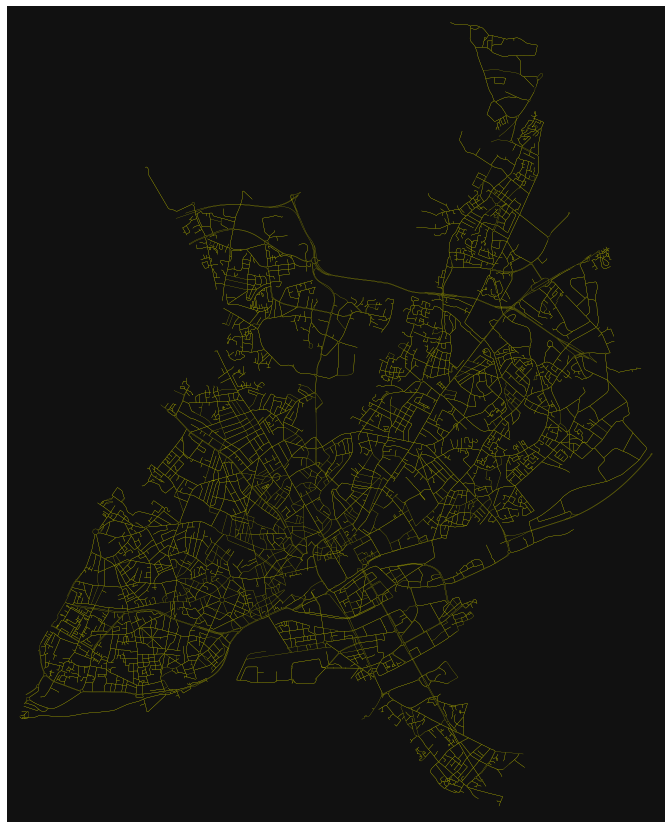

(293199518, 331942385)

In [3]:
# Load the graph
#G = ox.load_graphml("Manhattan.graphml")

# Plot the graph
fig, ax = ox.plot_graph(G, figsize=(15, 15), node_size=0, edge_color='y', edge_linewidth=0.2)

# Two pairs of (lat,lng) coordinates
origin_coordinates = (47.208358,-1.549719)
destination_coordinates = (47.160292575285, -1.5421206875803153)

# If you want to take an address (osmx will use Nominatim service for this)
# origin_coordinates = ox.geocode("2 Broad St, New York, NY 10005")

# In the graph, get the nodes closest to the points
origin_node = ox.nearest_nodes(G, origin_coordinates[1],origin_coordinates[0])
destination_node = ox.nearest_nodes(G, destination_coordinates[1],destination_coordinates[0])

origin_node,destination_node
#https://www.openstreetmap.org/node/293199518

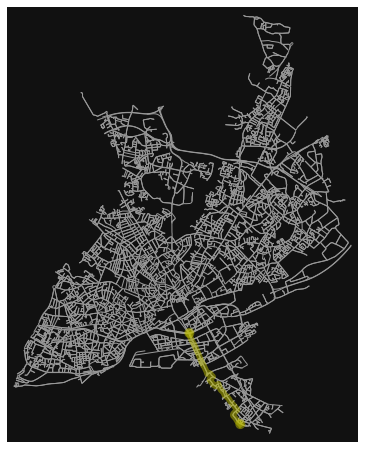

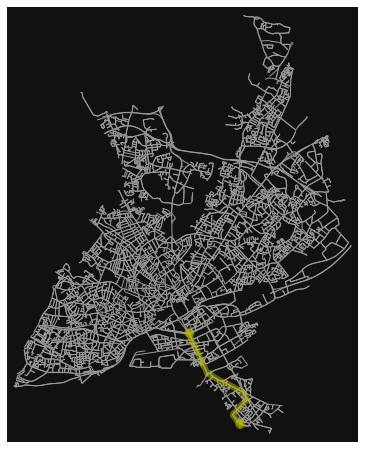

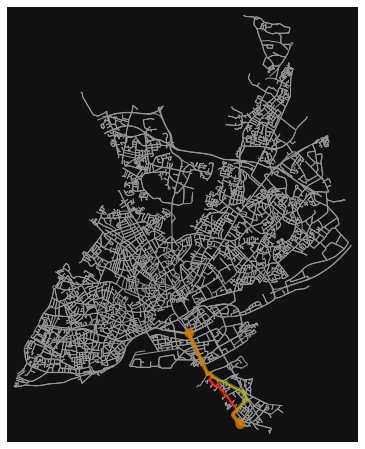

In [4]:
# Get the shortest route by distance
shortest_route_by_distance = ox.distance.shortest_path(G, origin_node, destination_node, weight='length')

# Plot the shortest route by distance
fig, ax = ox.plot_graph_route(G, shortest_route_by_distance, route_color='y', route_linewidth=6, node_size=0)

# Get the shortest route by travel time
shortest_route_by_travel_time = ox.shortest_path(G, origin_node, destination_node, weight='travel_time')

# Plot the shortest route by travel time
fig, ax = ox.plot_graph_route(G, shortest_route_by_travel_time, route_color='y', route_linewidth=6, node_size=0)

# Plot the 2 routes
fig, ax = ox.plot_graph_routes(G, routes=[shortest_route_by_distance, shortest_route_by_travel_time], route_colors=['r', 'y'], route_linewidth=6, node_size=0)

In [5]:
# Get the travel time, in seconds
# Note here that we use "nx" (networkx), not "ox" (osmnx)
travel_time_in_seconds = nx.shortest_path_length(G, origin_node, destination_node, weight='travel_time')
print(travel_time_in_seconds)

#The travel time in "HOURS:MINUTES:SECONDS" format
travel_time_in_hours_minutes_seconds = str(timedelta(seconds=travel_time_in_seconds))
print(travel_time_in_hours_minutes_seconds)

# Get the distance in meters
distance_in_meters = nx.shortest_path_length(G, origin_node, destination_node, weight='length')
print(distance_in_meters)
# Distance in kilometers
distance_in_kilometers = distance_in_meters / 1000
print(distance_in_kilometers)

386.1
0:06:26.100000
3685.3900000000003
3.6853900000000004
